# PROBLEM STATEMENT

# Social buzz is a fast growing technology unicorn that need to adapt quickly to its global scale.Three requirements that we fulfill for the project are
1.Audit for big data[ Diverse set of information ]         
2.Recommendations of IPO [ Initial Public Offerings ]     
3.Analysis of popular content.          

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from warnings import filterwarnings
filterwarnings('ignore')
import seaborn as sns

In [2]:
df=pd.read_csv('Reactions.csv')
df.head()

,Unnamed: 0,Content ID,Reaction Type,Datetime,Content Type,Category,Sentiment,Score
0,1,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,11/7/2020 9:43,photo,Studying,negative,0
1,2,97522e57-d9ab-4bd6-97bf-c24d952602d2,dislike,6/17/2021 12:22,photo,Studying,negative,10
2,3,97522e57-d9ab-4bd6-97bf-c24d952602d2,scared,4/18/2021 5:13,photo,Studying,negative,15
3,4,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,1/6/2021 19:13,photo,Studying,negative,0
4,5,97522e57-d9ab-4bd6-97bf-c24d952602d2,interested,8/23/2020 12:25,photo,Studying,positive,30


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24573 entries, 0 to 24572
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Unnamed: 0     24573 non-null  int64 
 1   Content ID     24573 non-null  object
 2   Reaction Type  24573 non-null  object
 3   Datetime       24573 non-null  object
 4   Content Type   24573 non-null  object
 5   Category       24573 non-null  object
 6   Sentiment      24573 non-null  object
 7   Score          24573 non-null  int64 
dtypes: int64(2), object(6)
memory usage: 1.5+ MB


In [4]:
df.shape

(24573, 8)

In [5]:
df.describe()

,Unnamed: 0,Score
count,24573.000000,24573.000000
mean,12774.614821,39.622553
std,7379.314372,26.043011
min,1.000000,0.000000
25%,6383.000000,15.000000
50%,12775.000000,35.000000
75%,19168.000000,65.000000
max,25552.000000,75.000000


In [6]:
df.describe(include=object)

,Content ID,Reaction Type,Datetime,Content Type,Category,Sentiment
count,24573,24573,24573,24573,24573,24573
unique,962,16,24010,1,29,3
top,5bb364a6-8646-4cdb-b1cf-09f4125718d8,heart,2/9/2021 21:34,photo,animals,positive
freq,48,1622,4,24573,1805,13807


# DATA CLEANING:

In [7]:
df.isnull().sum()/len(df)*100

Unnamed: 0       0.0
Content ID       0.0
Reaction Type    0.0
Datetime         0.0
Content Type     0.0
Category         0.0
Sentiment        0.0
Score            0.0
dtype: float64

# `Interpretation`:
There is no null values.

In [8]:
df['Category'].replace(value=['Animals','Healthy Eating','Technology','Science','Culture','Travel','Food','Education','Soccer','Studying','Fitness','Veganism','Public Speaking'],to_replace=['animals','healthy eating','technology','science','culture','travel','food','education','soccer','studying','fitness','veganism','public speaking'],inplace=True)

In [9]:
df['Category'].value_counts()

Animals            1897
Science            1796
Healthy Eating     1717
Food               1699
Technology         1698
Culture            1676
cooking            1664
Travel             1647
Soccer             1457
Education          1433
Fitness            1395
Studying           1363
dogs               1338
tennis             1328
Veganism           1248
Public Speaking    1217
Name: Category, dtype: int64

In [10]:
dups=df.duplicated()
df[dups]

,Unnamed: 0,Content ID,Reaction Type,Datetime,Content Type,Category,Sentiment,Score


# `Interpretation`:
There is no duplicate records.

In [11]:
df=df.drop(['Unnamed: 0','Content ID'],axis=1)

# `Interpretation`:
Dropped the insignficant columns

#                       DATA VISUALIZATION

# UNIVARIATE ANALYSIS

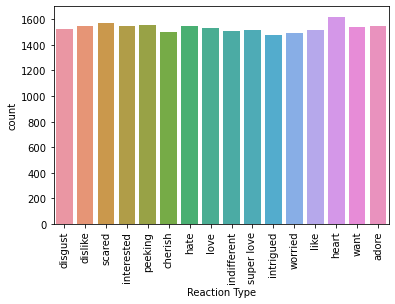

In [12]:
sns.countplot(df['Reaction Type']);
plt.xticks(rotation=90)
plt.show()

# `Interpretation`:
Based on the plor,we can clearly see that customers mostly react heart reaction which means they like the social buzz technology.

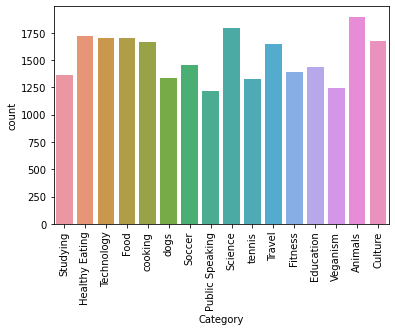

In [13]:
sns.countplot(df['Category'])
plt.xticks(rotation=90)
plt.show()

# `Interpretation`:
Animal lovers,people who like science using this social buzz app more and the people who are veg eater using the social buzz app less.So,we must concentrate on the people who are veg eater to increase our revenue.

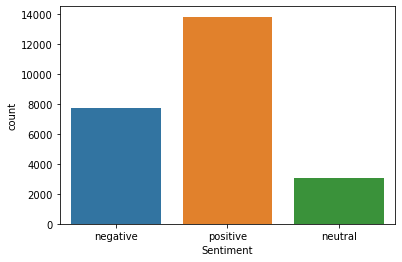

In [14]:
sns.countplot(df['Sentiment']);

# `Interpretation`:
We can see that the people are giving positive review for the social buzz application.

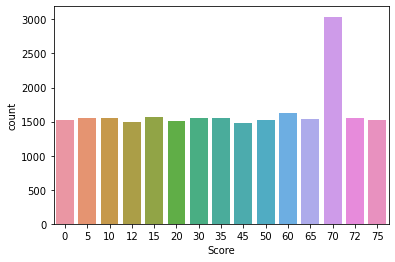

In [15]:
sns.countplot(df['Score'])
plt.show()

# `Interpretation`:
Fro the count plot, we can understand that most top score given by the people is 70 score and the least score is 0.

# BIVARIATE ANALYSIS

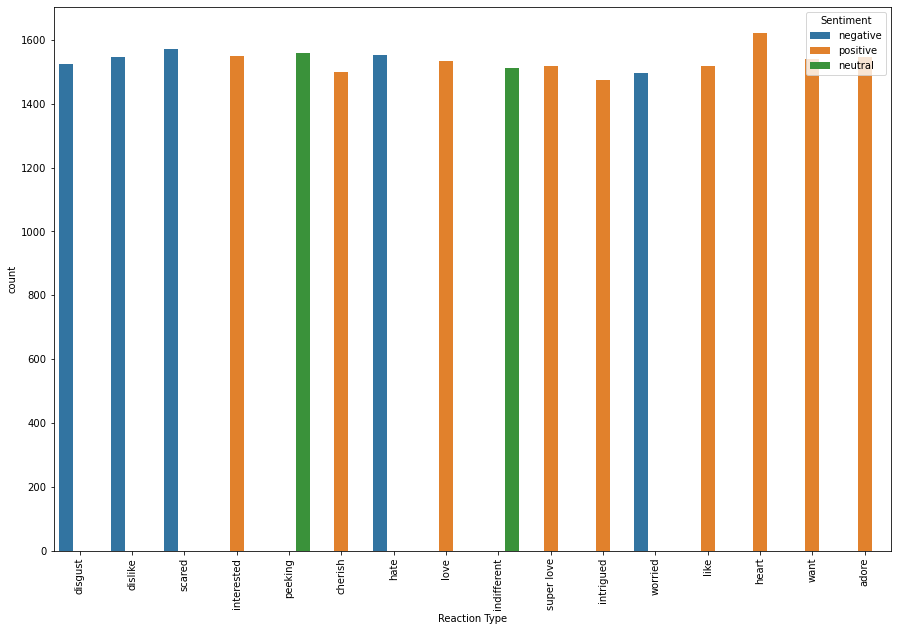

In [16]:
plt.figure(figsize=(15,10))
sns.countplot(df['Reaction Type'],hue=df['Sentiment'])
plt.xticks(rotation=90)
plt.show()

#  `Interpretation`:
Most people who know about the social app gave positive review and heart reaction.

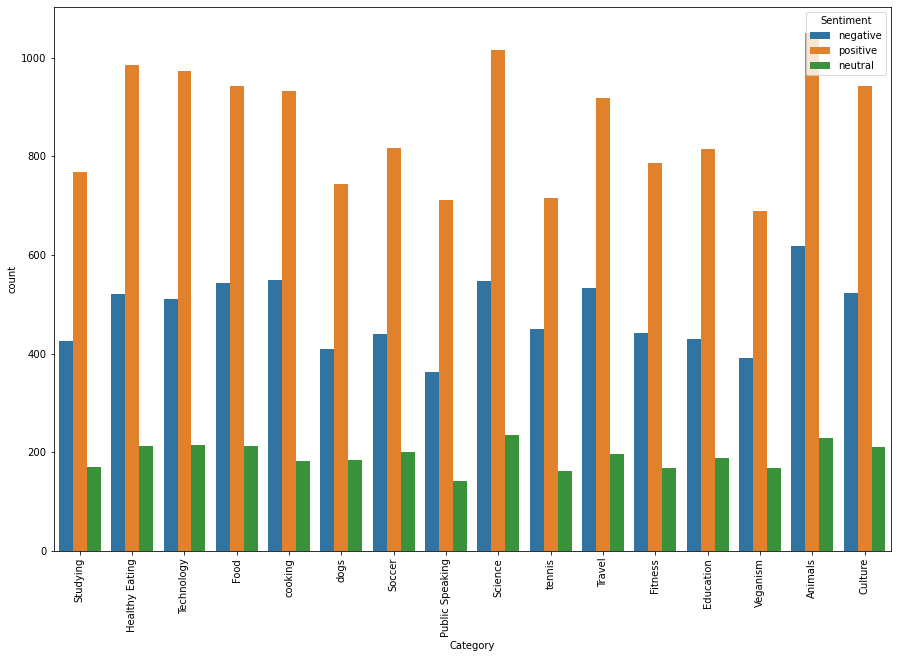

In [17]:
plt.figure(figsize=(15,10))
sns.countplot(df['Category'],hue=df['Sentiment'])
plt.xticks(rotation=90)
plt.show()

# `Interpretation`:
Based on the plot, we can understand more positive and negative review given by animal lovers ,neutral review gave by the people who are public speakers.

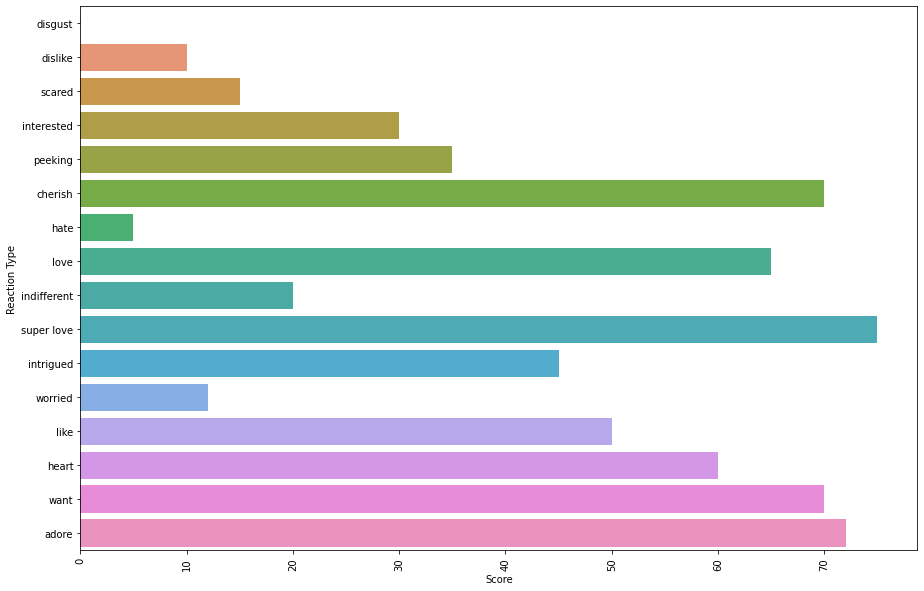

In [18]:
plt.figure(figsize=(15,10))
sns.barplot(df['Score'],df['Reaction Type'])
plt.xticks(rotation=90)
plt.show()

# `Interpretation`:
The super love reaction got the top score above 70 based on the visualization.

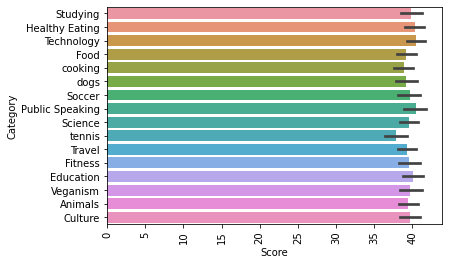

In [19]:
sns.barplot(df['Score'],df['Category'])
plt.xticks(rotation=90)
plt.show()

# `Interpretation`:
Based on the visualization,technology got the top score 70.

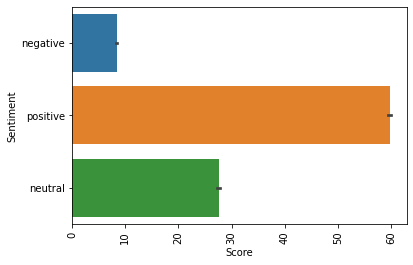

In [20]:
sns.barplot(df['Score'],df['Sentiment'])
plt.xticks(rotation=90)
plt.show()

# `Interpretation`:
From the plot, we can clearly understand positive review got score 60.

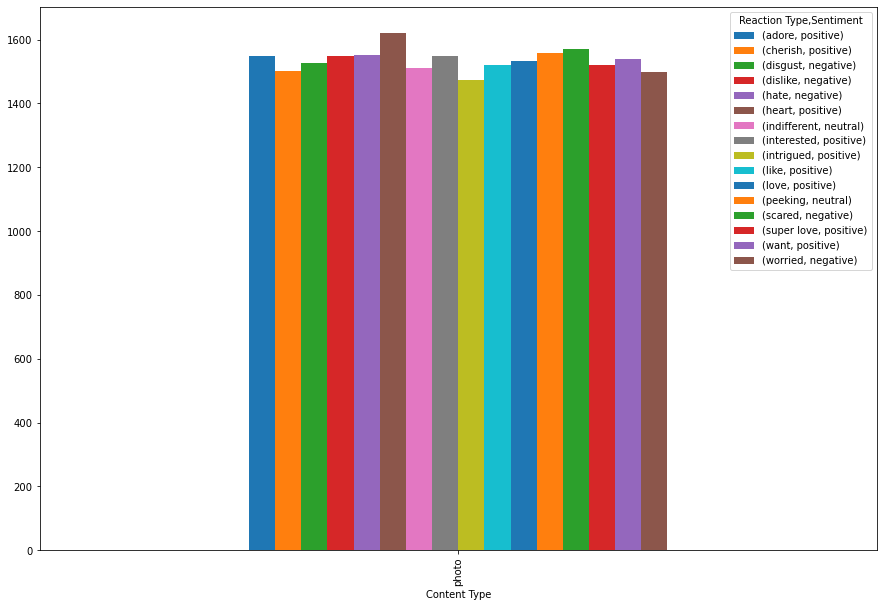

In [21]:
pd.crosstab(df['Content Type'],[df['Reaction Type'],df['Sentiment']]).plot(kind='bar',figsize=(15,10))
plt.show()